# How to Use Rakan

How to play with Rakan in Jupyter. Firstly, import it.

In [1]:
import matplotlib.pyplot as plt
from rakan.base import Rakan

Initialize rakan and seed it a `.dnx` file. Available `.dnx` files can be found [here](https://gis.pengra.io).

In [2]:
r = Rakan()
r.read_nx("WA4.dnx")

You can view the state's current redistricting through `.show()`. Additionally, the following stats are available to you as well:

Population Score: 539677274219.6111
Compactness Score: 946.6744229972878
Democrat Seats: 0
Republican Seats: 0
Democrat Proportions: nan%, nan%, nan%, nan%
Republican Proportions: nan%, nan%, nan%, nan%


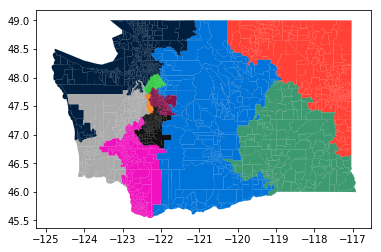

In [3]:
print("Population Score:", r.population_score())
print("Compactness Score:", r.compactness_score())
print("Democrat Seats:", r.democrat_seats())
print("Republican Seats:", r.republican_seats())
print("Democrat Proportions:", ", ".join(["{:.2f}%".format(r.democrat_proportion(i) * 100) for i in range(4)]))
print("Republican Proportions:", ", ".join(["{:.2f}%".format(r.republican_proportion(i) * 100) for i in range(4)]))
r.show()

You are then able to run rakan with any alpha/beta value and view the rejection rates of each run. For instance, here's 100 steps with an alpha value of 1e-10.

Score: 1.0
Rejection Rate: 0.00%
District populations: [2788403, 1529732, 2183838, 3109773, 2642955, 2141916, 2835759, 1773226, 3742017, 3287696]
Distance from ideal: 2.139719838227423


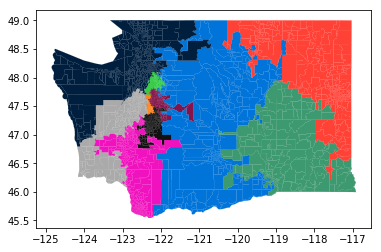

Score: 1.0
Rejection Rate: 0.00%
District populations: [2900454, 1667185, 2206686, 3166773, 2524714, 2041730, 2721896, 1734955, 3768184, 3302738]
Distance from ideal: 2.1834861610086147


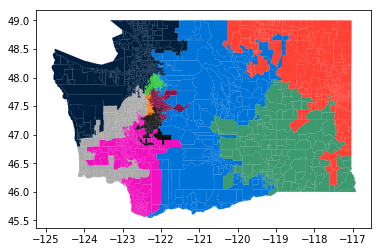

Score: 1.0
Rejection Rate: 0.00%
District populations: [2871384, 1651857, 2247439, 3243996, 2650336, 2009421, 2644931, 1726824, 3822130, 3166997]
Distance from ideal: 2.134473886718866


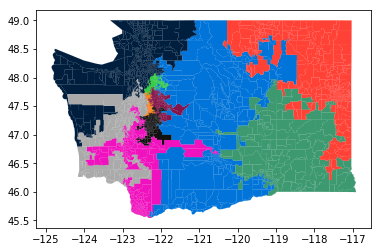

Score: 1.0
Rejection Rate: 0.00%
District populations: [2712365, 1648301, 2099097, 3287219, 2822168, 2115272, 2482451, 1756091, 3857806, 3254545]
Distance from ideal: 2.2403765808095657


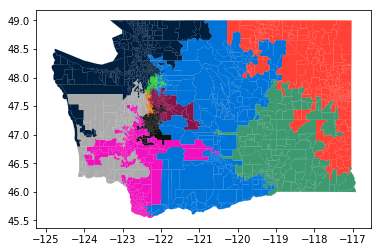

Score: 1.0
Rejection Rate: 0.00%
District populations: [2647161, 1573041, 2137320, 3177061, 3018373, 2341259, 2430371, 1756839, 3657620, 3296270]
Distance from ideal: 2.134660172154629


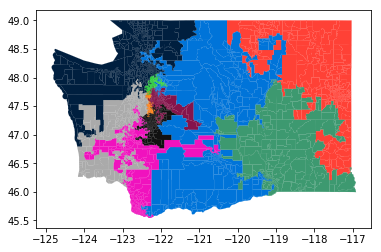

Score: 1.0
Rejection Rate: 0.00%
District populations: [2671557, 1616850, 2161833, 3151005, 3031634, 2386235, 2398421, 1739936, 3647711, 3230133]
Distance from ideal: 2.0851543374835297


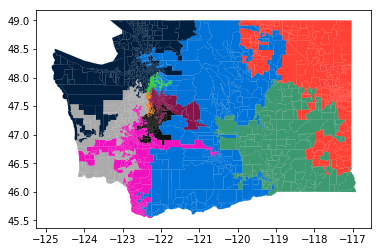

Score: 1.0
Rejection Rate: 0.00%
District populations: [2717765, 1587647, 2144436, 3138624, 3081564, 2572033, 2333026, 1722394, 3453291, 3284535]
Distance from ideal: 2.0419353481991673


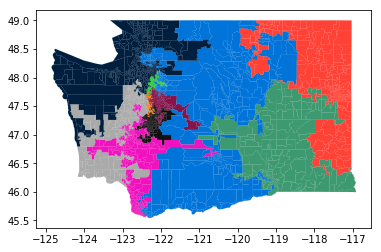

Score: 1.0
Rejection Rate: 0.00%
District populations: [2695657, 1604430, 2292819, 3123334, 2924287, 2681879, 2302674, 1728214, 3315428, 3366593]
Distance from ideal: 1.9097053367704597


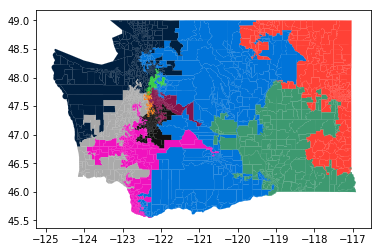

Score: 1.0
Rejection Rate: 0.00%
District populations: [2673385, 1555871, 2208269, 3084122, 3125006, 2804052, 2221796, 1739465, 3350366, 3272983]
Distance from ideal: 2.065444570192448


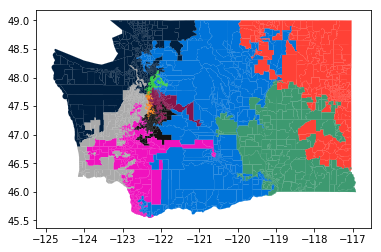

Score: 1.0
Rejection Rate: 0.00%
District populations: [2734052, 1594866, 2170600, 3127458, 3084879, 2827108, 2138491, 1729889, 3382076, 3245896]
Distance from ideal: 2.1357759643007967


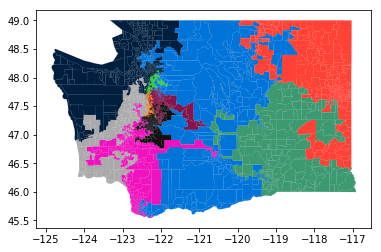

In [5]:
r.ALPHA = 0
r.BETA = 0

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()
    

Note as the alpha value rises, so does the rejection rate.

Score: 1.0
Rejection Rate: 0.00%
District populations: [2842311, 1524929, 2153795, 3055481, 2982697, 2932961, 2087219, 1746997, 3524143, 3184782]
Distance from ideal: 2.228654425729053


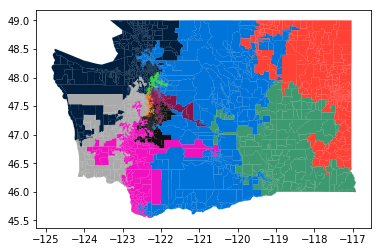

Score: 1.0
Rejection Rate: 0.00%
District populations: [2847111, 1558456, 2126799, 2981884, 2956866, 2992649, 2152513, 1765574, 3406870, 3246593]
Distance from ideal: 2.159208751651363


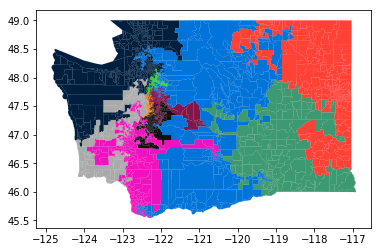

Score: 1.0
Rejection Rate: 0.00%
District populations: [2761212, 1528955, 2211567, 2955545, 2930122, 3165066, 2180675, 1750423, 3284993, 3266757]
Distance from ideal: 2.106758454814163


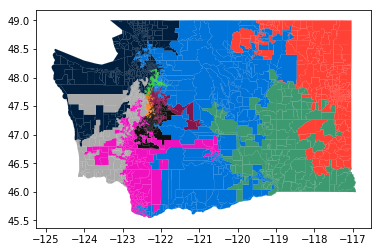

Score: 1.0
Rejection Rate: 0.00%
District populations: [2800161, 1574274, 2309622, 2842440, 2924430, 3134783, 2173887, 1730302, 3330926, 3214490]
Distance from ideal: 2.017291513469301


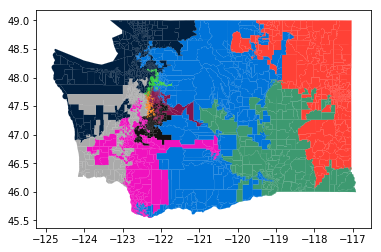

Score: 1.0
Rejection Rate: 0.00%
District populations: [2868957, 1588155, 2400691, 2813290, 2874965, 3355517, 2038557, 1720207, 3194835, 3180141]
Distance from ideal: 2.0483838970260204


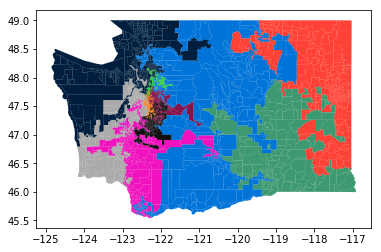

Score: 1.0
Rejection Rate: 0.00%
District populations: [2858048, 1640413, 2387020, 2740254, 2794695, 3372432, 2101836, 1721785, 3237000, 3181832]
Distance from ideal: 1.9689195233474226


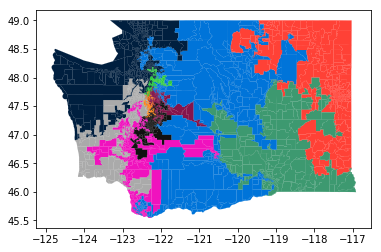

Score: 1.0
Rejection Rate: 0.00%
District populations: [2759878, 1573629, 2301912, 2680430, 2926637, 3489632, 2128632, 1718463, 3280336, 3175766]
Distance from ideal: 2.0675686082538274


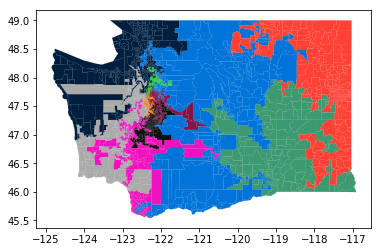

Score: 1.0
Rejection Rate: 0.00%
District populations: [2679975, 1500165, 2274231, 2668782, 2843262, 3663490, 2177323, 1755316, 3296871, 3175900]
Distance from ideal: 2.0795530993191362


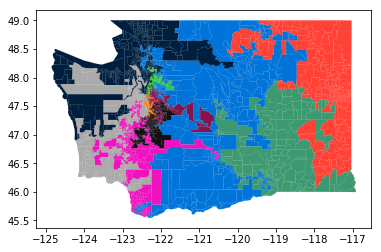

Score: 1.0
Rejection Rate: 0.00%
District populations: [2630897, 1471476, 2275555, 2623380, 3092517, 3537073, 2062703, 1743074, 3199719, 3398921]
Distance from ideal: 2.198028331902264


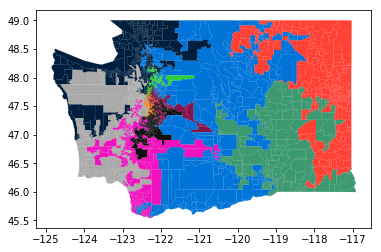

Score: 1.0
Rejection Rate: 0.00%
District populations: [2605315, 1486135, 2383486, 2669305, 3022276, 3678389, 2103605, 1759059, 3098888, 3228857]
Distance from ideal: 2.0601563683788733


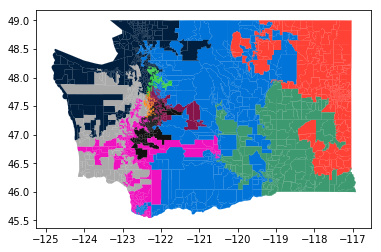

In [6]:
r.ALPHA = 0
r.BETA = 0

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()
    

Note how the statistics have changed.

In [14]:
with open('random.csv', 'w') as handle:
    for line in r._move_history:
        handle.write(','.join([str(i) for i in line]))
        handle.write('\n')
    r._move_history = []

Score: 1.0
Rejection Rate: 0.00%
District populations: [2653175, 1510813, 2417508, 2677071, 2982470, 3470643, 2036809, 1764661, 3451608, 3070557]
Distance from ideal: 2.062072227664616


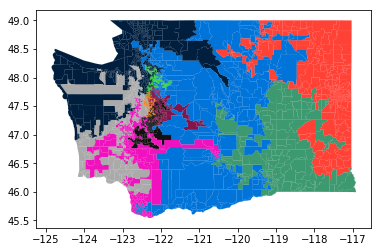

Score: 1.0
Rejection Rate: 0.00%
District populations: [2673724, 1585795, 2475408, 2670924, 2891099, 3522709, 2022315, 1757141, 3313668, 3122532]
Distance from ideal: 1.9769048309958992


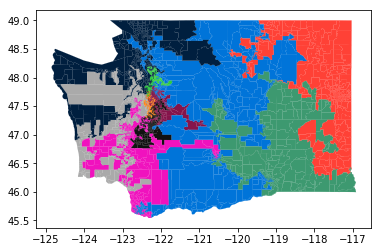

Score: 1.0
Rejection Rate: 0.00%
District populations: [2612856, 1645759, 2319150, 2718657, 3128711, 3328248, 2020234, 1750001, 3386333, 3125366]
Distance from ideal: 2.0579601207052804


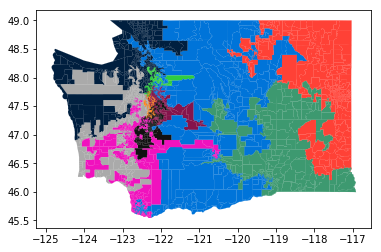

Score: 1.0
Rejection Rate: 0.00%
District populations: [2539607, 1720168, 2395031, 2686621, 3098429, 3384160, 2015626, 1759495, 3354228, 3081950]
Distance from ideal: 1.987861871461897


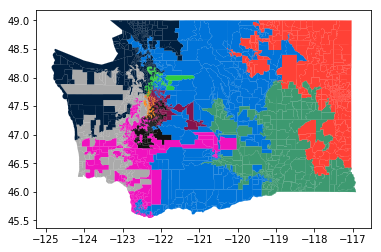

Score: 1.0
Rejection Rate: 0.00%
District populations: [2455957, 1714066, 2365730, 2734593, 3247696, 3367279, 2065378, 1752966, 3402873, 2928777]
Distance from ideal: 2.0461135192718043


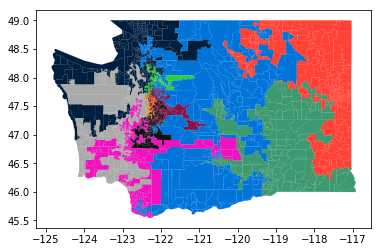

Score: 1.0
Rejection Rate: 0.00%
District populations: [2483668, 1713828, 2430278, 2686389, 3267752, 3536667, 2006543, 1730299, 3311979, 2867912]
Distance from ideal: 2.0380329563901953


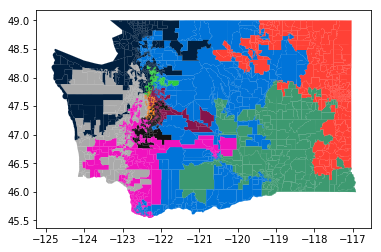

Score: 1.0
Rejection Rate: 0.00%
District populations: [2440962, 1680153, 2493557, 2678390, 3214358, 3440332, 2000871, 1751556, 3435926, 2899210]
Distance from ideal: 2.036125547165456


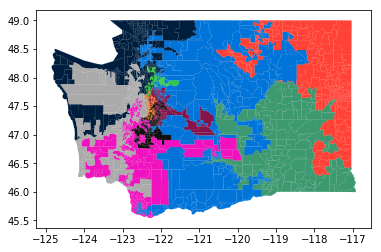

Score: 1.0
Rejection Rate: 0.00%
District populations: [2499974, 1647487, 2539719, 2657033, 3276724, 3480619, 2021239, 1754018, 3258648, 2899854]
Distance from ideal: 1.9628881002592056


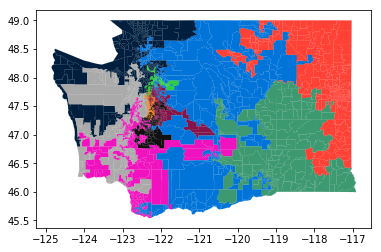

Score: 1.0
Rejection Rate: 0.00%
District populations: [2549777, 1660312, 2471615, 2709806, 3137957, 3512393, 2059814, 1735981, 3286867, 2910793]
Distance from ideal: 1.951317662183077


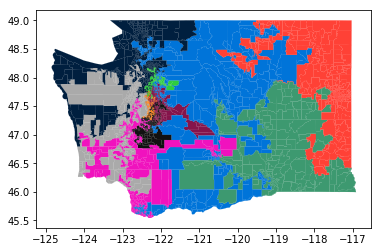

Score: 1.0
Rejection Rate: 0.00%
District populations: [2712613, 1680932, 2426870, 2854579, 3106326, 3434775, 2023253, 1744406, 3231069, 2820492]
Distance from ideal: 1.9501703743549867


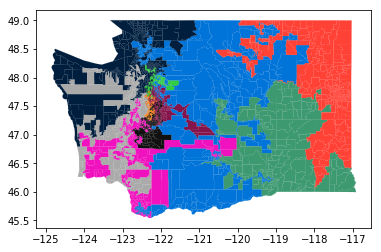

In [15]:
r.ALPHA = 0
r.BETA = 0

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

Score: 1.0
Rejection Rate: 0.00%
District populations: [2864497, 1629662, 2447969, 2832802, 3023583, 3533825, 1930986, 1749547, 3311274, 2711170]
Distance from ideal: 2.040276447586672


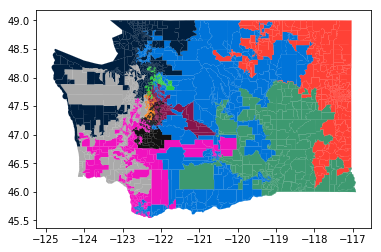

Score: 1.0
Rejection Rate: 0.00%
District populations: [2838019, 1653466, 2363385, 2775192, 2960982, 3590440, 2001830, 1730695, 3373843, 2747463]
Distance from ideal: 2.0470272781412477


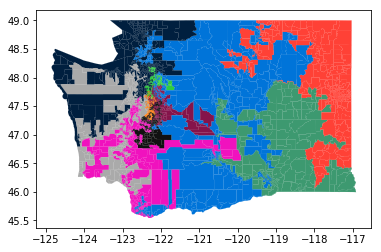

Score: 1.0
Rejection Rate: 0.00%
District populations: [2794468, 1670777, 2524113, 2716921, 2874373, 3548235, 2022514, 1761539, 3324122, 2798253]
Distance from ideal: 1.870676809556558


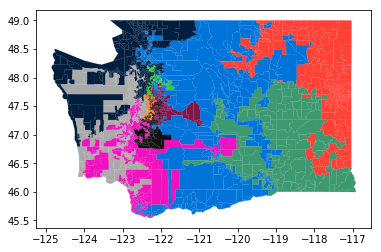

Score: 1.0
Rejection Rate: 0.00%
District populations: [2863478, 1614409, 2557732, 2692281, 2794704, 3717711, 2059760, 1775483, 3175265, 2784492]
Distance from ideal: 1.848828792737864


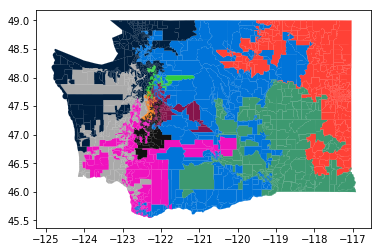

Score: 1.0
Rejection Rate: 0.00%
District populations: [2889689, 1621492, 2513339, 2677448, 2800942, 3673877, 2124607, 1783323, 3206153, 2744445]
Distance from ideal: 1.8216526283626682


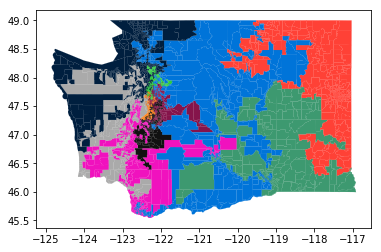

Score: 1.0
Rejection Rate: 0.00%
District populations: [2838349, 1629683, 2556523, 2767209, 2912676, 3703386, 2088263, 1769920, 3108912, 2660394]
Distance from ideal: 1.8204020193341237


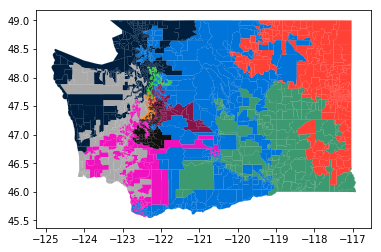

Score: 1.0
Rejection Rate: 0.00%
District populations: [2902320, 1637125, 2493015, 2829542, 2849092, 3707389, 2072429, 1771138, 3172467, 2600798]
Distance from ideal: 1.8767988787537235


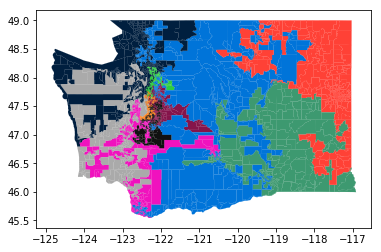

Score: 1.0
Rejection Rate: 0.00%
District populations: [2824373, 1571265, 2558540, 2786729, 2882827, 3866406, 2063163, 1752556, 3178977, 2550479]
Distance from ideal: 1.937103123200161


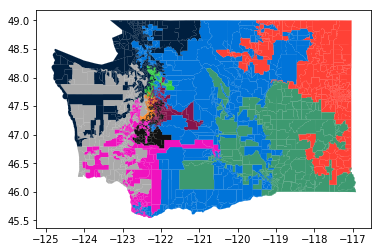

Score: 1.0
Rejection Rate: 0.00%
District populations: [2908943, 1590523, 2514007, 2760878, 2762039, 3791608, 2047426, 1748343, 3165472, 2746076]
Distance from ideal: 1.9310901366086795


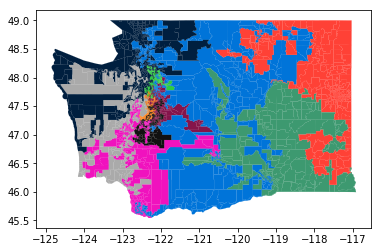

Score: 1.0
Rejection Rate: 0.00%
District populations: [2839781, 1637388, 2405095, 2695180, 2946496, 3865138, 2086947, 1759222, 3049481, 2750587]
Distance from ideal: 1.9400372148368477


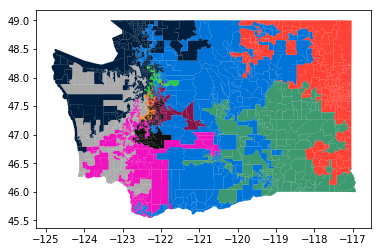

In [16]:
r.ALPHA = 0
r.BETA = 0

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

In [17]:
with open('random.csv', 'a') as handle:
    for line in r._move_history:
        handle.write(','.join([str(i) for i in line]))
        handle.write('\n')
    r._move_history = []

Score: 1.0
Rejection Rate: 0.00%
District populations: [3015116, 1591903, 2511390, 2699684, 2827311, 3921609, 1996884, 1761832, 3108926, 2600660]
Distance from ideal: 1.9627098807907644


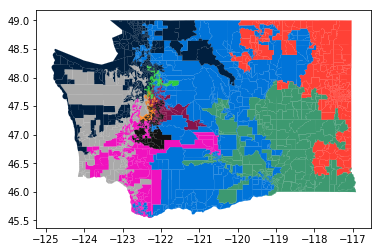

Score: 1.0
Rejection Rate: 0.00%
District populations: [2742720, 1655232, 2502232, 2737119, 3040304, 3970933, 2017874, 1734152, 3057257, 2577492]
Distance from ideal: 1.9440329414105417


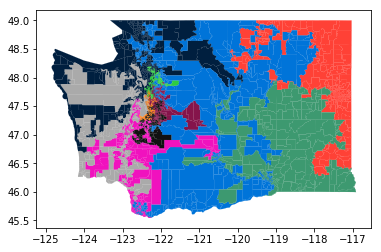

Score: 1.0
Rejection Rate: 0.00%
District populations: [2799697, 1550546, 2611220, 2606374, 3021046, 4119893, 1979263, 1769324, 2970595, 2607357]
Distance from ideal: 1.9292729893992064


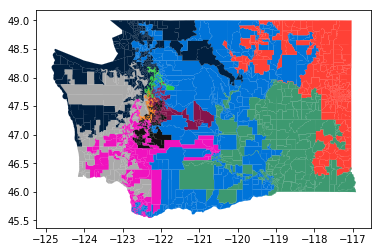

Score: 1.0
Rejection Rate: 0.00%
District populations: [2913747, 1616353, 2600760, 2629777, 2917176, 4038349, 2035030, 1766350, 2932888, 2584885]
Distance from ideal: 1.854619004993794


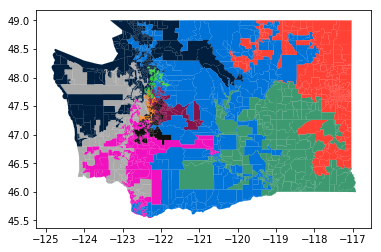

Score: 1.0
Rejection Rate: 0.00%
District populations: [2717168, 1639260, 2517598, 2733810, 3119857, 3931680, 2086331, 1751057, 2767394, 2771160]
Distance from ideal: 1.8589212383257125


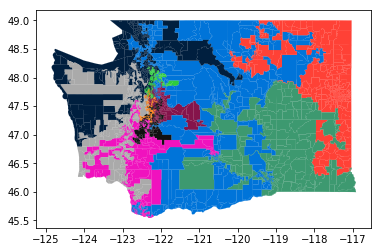

Score: 1.0
Rejection Rate: 0.00%
District populations: [2718572, 1670222, 2486441, 2751558, 3195280, 3986900, 1994761, 1746242, 2797226, 2688113]
Distance from ideal: 1.9331127739380145


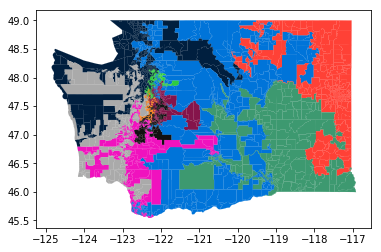

Score: 1.0
Rejection Rate: 0.00%
District populations: [2857788, 1708383, 2499600, 2771384, 3012599, 3983631, 1979606, 1750487, 2803118, 2668719]
Distance from ideal: 1.9020703225599536


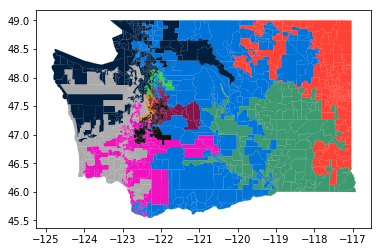

Score: 1.0
Rejection Rate: 0.00%
District populations: [2801774, 1732484, 2511416, 2740448, 3078567, 4023014, 1978075, 1743247, 2765892, 2660398]
Distance from ideal: 1.8812171083776017


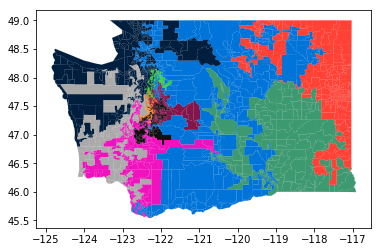

Score: 1.0
Rejection Rate: 0.00%
District populations: [2712260, 1730297, 2584313, 2711964, 2945317, 3979695, 2025364, 1741604, 2954410, 2650091]
Distance from ideal: 1.7918338994554128


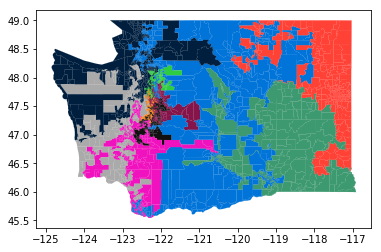

In [ ]:
r.ALPHA = 0
r.BETA = 0

for round in range(20):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()
    
    with open('random.csv', 'a') as handle:
        for line in r._move_history:
            handle.write(','.join([str(i) for i in line]))
            handle.write('\n')
        r._move_history = []

In [7]:
print("Population Score:", r.population_score())
print("Compactness Score:", r.compactness_score())
print("Democrat Seats:", r.democrat_seats())
print("Republican Seats:", r.republican_seats())
print("Democrat Proportions:", ", ".join(["{:.2f}%".format(r.democrat_proportion(i) * 100) for i in range(4)]))
print("Republican Proportions:", ", ".join(["{:.2f}%".format(r.republican_proportion(i) * 100) for i in range(4)]))

Population Score: 1578076603.6666667
Compactness Score: 663.2432081807082
Democrat Seats: 2
Republican Seats: 2
Democrat Proportions: 43.75%, 39.54%, 55.85%, 54.97%
Republican Proportions: 55.02%, 59.40%, 42.83%, 43.61%
